In [152]:
import cv2
from PIL import Image
import numpy as np
from numpy import interp
import matplotlib.pyplot as plt

In [99]:
img = cv2.imread('images/img_test.png',1)

In [124]:
#How many elements are in that data. 
print(img.size)

#What is the shape of the array.
print(img.shape)

#What type are the elements.
print(img.dtype)

#What are the pixel values
print(img[0,0])



1958682
(649, 1006, 3)
uint8
[186 203 230]


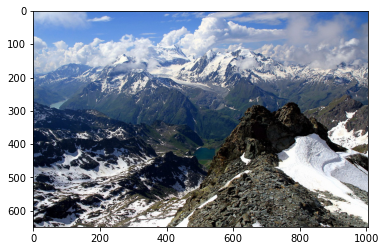

In [101]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [5]:
h = img.shape[0]
w = img.shape[1]
d = img.shape[2]

print(img[0][0][0])
# normalize first
# img = img.astype("float64") / 255
print(img[0][0][0])



186
186


In [6]:
# Intialize Array for Blended Images
imgBlend = np.zeros((h,w,d))

In [100]:
print(imgBlend)

[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]


In [7]:
imgBlend1 = np.ones((1,h,w,d)) 

In [80]:
print(imgBlend1.shape)


(1, 649, 1006, 3)


In [81]:
imgCombined = np.append(imgBlend, imgBlend1, axis=0)


In [103]:
imgCombined = np.empty((1,h,w,d), dtype=float)

In [125]:
imgCombined = []


In [126]:
print(imgCombined.shape)

AttributeError: 'list' object has no attribute 'shape'

In [29]:
# Intialize Array for Blended Images
imgBlend = np.zeros((h,w,d))

# imgCombined = []

# MULTIPLY
# for alpha in np.arange(0,1,0.1):
#     imgBlend = img
for y in range(0,h):
    #Search each pixel in the row. x = pixel
    for x in range(0,w):
        #Search each RGB value.
        for z in range(0,d):
        
            # Apply Filter to seperate image. Each run through saves a blend image.  Keep the original sacred.
            imgBlend[y,x,z] = img[y,x,z] * img[y,x,z]

# Add new blended image to imgCombined
# imgCombined.append(imgBlend)
            
imgCombined = np.asarray(imgBlend)

In [148]:
# Multiply Function

def multiply(img):
    # Get the size of the image
    h = img.shape[0]
    w = img.shape[1]
    d = img.shape[2]

    # Check if image is normalized between 0 - 1.
    # if (max(img[0][0]) > 1):
        # Convert to float & normalize
    img = img.astype("float64") / 255

    # Apply the Filter
    for y in range(0,h):
        #Search each pixel in the row. x = pixel
        for x in range(0,w):
            #Search each RGB value.
            for z in range(0,d):
                # Apply Filter to seperate image. 
                img[y,x,z] = img[y,x,z] * img[y,x,z]
    
    # return Multiply image
    return img

In [54]:
# Screen Function

def screen(img):
    # Get the size of the image
    h = img.shape[0]
    w = img.shape[1]
    d = img.shape[2]

    # Convert to float
    img = img.astype("float64") / 255

    # Apply the Filter
    for y in range(0,h):
        #Search each pixel in the row. x = pixel
        for x in range(0,w):
            #Search each RGB value.
            for z in range(0,d):
                # Apply Filter to seperate image. 
                img[y,x,z] = 1 - (1 - img[y,x,z]) * (1 - img[y,x,z])
    
    # return Multiply image
    return img

In [201]:
def hdr(img):

    # Get the size of the image
    h = img.shape[0]
    w = img.shape[1]
    d = img.shape[2]

    # Check if image is normalized between 0 - 1.
    # if (max(img[0][0]) > 1):
        # Convert to float & normalize
    img = img.astype("float64") / 255


    # Apply the Filter
    for y in range(0,h):
        #Search each pixel in the row. x = pixel
        for x in range(0,w):
            #Search each RGB value.
            for z in range(0,d):
                # Apply Filter to seperate image. If it is above 2/3 brightness apply mulitply.  Below 1/3 brightness apply screen. Interpolate the alpha mask.
                # brightness = (img[y,x,0] * 0.2126) + (img[y,x,1] * 0.7152) + (img[y,x,z] * 0.0722)
                brightness = (img[y,x,0] + img[y,x,1] + img[y,x,z]) / 3   

                if(brightness > 1):
                    print("It's the brightness")
                if (brightness > 0):
                #     alpha = np.interp(brightness,[.7,1],[1,0])
                    # Apply Multiply blend and save the image
                    img[y,x,z] = img[y,x,z] * img[y,x,z]
                    
                
                    if (img[y,x,z] < 0 or img[y,x,z] > 1):
                        print("Oh NO")

                    # img[y,x,z] = max(img[y,x,z],0)
                    # img[y,x,z] = min(img[y,x,z],1)
                        
                   
                    # if (img[y,x,z] > 1):
                    #     print("to large")
                   
                # elif(img[y,x,z] < (1/3)):
                #     # Apply Screen bldn
                #     img[y,x,z] = 1 - (1 - img[y,x,z]) * (1 - img[y,x,z])

    # return hdr image
    return img

In [247]:
def blendImg(img, blend):
    # Get the size of the image
    h = img.shape[0]
    w = img.shape[1]
    d = img.shape[2]

    # Check if image is normalized between 0 - 1.
    # if (max(img[0][0]) > 1):
        # Convert to float & normalize
    img = img.astype("float64") / 255
    blend = blend.astype("float64") / 255


    # Apply the Filter
    for y in range(0,h):
        #Search each pixel in the row. x = pixel
        for x in range(0,w):
            #Search each RGB value.
            for z in range(0,d):
                # Apply Filter to seperate image. If it is above 2/3 brightness apply mulitply.  Below 1/3 brightness apply screen. Interpolate the alpha mask.
                brightness = (img[y,x,0] * 0.2126) + (img[y,x,1] * 0.7152) + (img[y,x,z] * 0.0722)
                # brightness = (img[y,x,0] + img[y,x,1] + img[y,x,z]) / 3   
                cutOff = (1 - 1/4)
                if(brightness < cutOff):
                    # alpha = np.interp(brightness,[0, 1],[1,0])
                    blend[y,x,z] = (img[y,x,z] * (1-brightness)) + (blend[y,x,z] * brightness)
                    # img[y,x,z] = max(img[y,x,z],0.01)
                    # img[y,x,z] = min(img[y,x,z],0.99)


    return blend


[136 162 207]


True

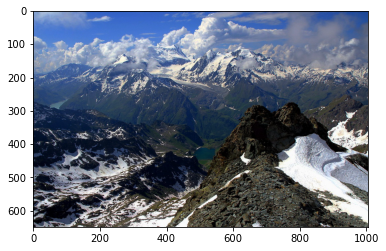

In [248]:
img1 = hdr(img)
img1 = img1 * 255
img1 = np.uint8(np.around(img1))
blended = blendImg(img, img1)
# img1 = img1.astype(int)
# blendedImg = cv2.addWeighted(img1, 1.0,img,0,0)

blended = blended * 255
# `blended = np.uint8(np.around(blended))
blended = np.uint8(blended)
# print(max((img1[0,0])))
# print(min(img1[0,0]))
print(img1[0,0])
plt.imshow(blended)
cv2.imwrite('test1.png', cv2.cvtColor(blended, cv2.COLOR_RGB2BGR))


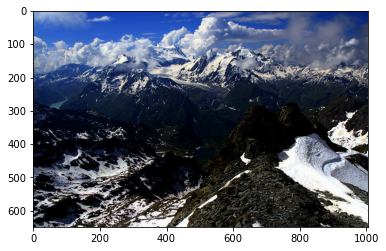

In [31]:
plt.imshow(img1)

In [55]:
#  SCREEN

# f(a,b)=1-(1-a)(1-b)

for y in range(0,h):
    #Search each pixel in the row. x = pixel
    for x in range(0,w):
        #Search each RGB value.
        for z in range(0,d):
          
            # Apply Filter
            img[y,x,z] = 1 - (1 - img[y,x,z]) * (1 - img[y,x,z])

In [43]:
# set back to integer
img = imgBlend * 255
img = img.astype(int)
print(img[0][0][0])

186


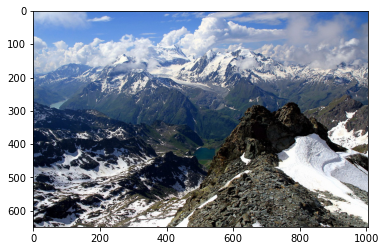

In [44]:

plt.imshow(img)